
Model Evaluation:
MAE: 7.775144510378473
MSE: 105.24629672995945
R2 Score: 0.2836655241441497

Feature Coefficients:
                              Feature  Coefficient
0                              gender     1.654601
14      occupation_type_Retail Worker     0.357884
16            occupation_type_Teacher     0.351144
12     occupation_type_Manual Laborer     0.278064
15          occupation_type_Scientist     0.272165
6              occupation_type_Driver     0.237711
9          occupation_type_Freelancer     0.222090
5          occupation_type_Consultant     0.211030
10  occupation_type_Healthcare Worker     0.193704
11            occupation_type_Manager     0.150894
17         occupation_type_Technician     0.128960
13      occupation_type_Office Worker     0.107281
7            occupation_type_Engineer    -0.018573
8        occupation_type_Entrepreneur    -0.217506
4          avg_exercise_hours_per_day   -60.192175
3             avg_sleep_hours_per_day  -147.049001
1              

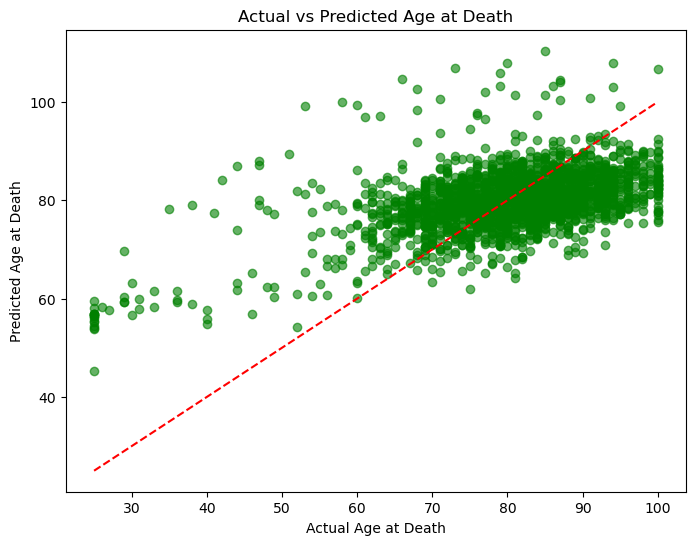

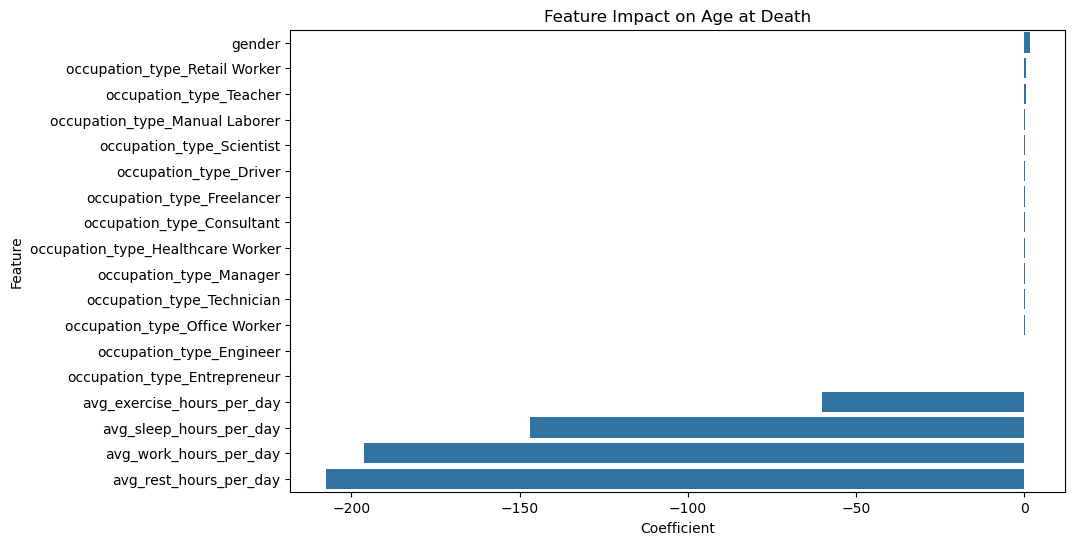

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("D:\Mechaine_Learning_Journey\Quality of life data.csv")


numeric_cols = ['avg_work_hours_per_day','avg_rest_hours_per_day',
                'avg_sleep_hours_per_day','avg_exercise_hours_per_day']

for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())  # safe way


data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data = pd.get_dummies(data, columns=['occupation_type'], drop_first=True)


y = data['age_at_death']
X = data.drop(['id','age_at_death'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)


coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coeff_df)


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Age at Death")
plt.ylabel("Predicted Age at Death")
plt.title("Actual vs Predicted Age at Death")
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title("Feature Impact on Age at Death")
plt.show()
